# Analyzing the generated graphs

In [120]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import sys
import os

sys.path.extend(['./..'])  # have to add the project path manually to the Python path
os.chdir('./..')

In [13]:
from src.VRG import VRG
from src.Rule import PartRule
from src.utils import load_pickle
from src.graph_stats import GraphStats
from src.graph_comparison import GraphPairCompare

In [16]:
def read_graph(gname):
    g = nx.read_edgelist(f'./src/tmp/graphs/{gname}.g', nodetype=int, create_using=nx.Graph())
    if not nx.is_connected(g):
        nodes_lcc = max(nx.connected_components(g), key=len)
        g = g.subgraph(nodes_lcc).copy()
    name = g.name
    g = nx.convert_node_labels_to_integers(g)
    g.name = name
    return g

In [118]:
def get_rows(name, orig_g, strategy, gen_graphs):
    cols = ['name', 'orig_n', 'orig_m', 'trial', 'strategy', 'gen_n', 'gen_m', 'deltacon', 'lambda_dist', 'cvm_degree', 'cvm_pagerank']

    rows = {col: [] for col in cols}
    
    orig_gstats = GraphStats(orig_g, 0)
    
    for i, gen_g in enumerate(gen_graphs):
        print(f'reading {name} #{i}', end='\t', flush=True)
        rows['name'].append(name)
        rows['orig_n'].append(orig_g.order())
        rows['orig_m'].append(orig_g.size())
        rows['trial'].append(i + 1)
        rows['strategy'].append(strategy)
        rows['gen_n'].append(gen_g.order())
        rows['gen_m'].append(gen_g.size())
        
        gen_gstats = GraphStats(gen_g, 0)
        gpc = GraphPairCompare(orig_gstats, gen_gstats)
        rows['deltacon'].append(gpc.deltacon0())
#         rows['lambda_dist'].append(gpc.lambda_dist())
        rows['lambda_dist'].append(np.nan)
        rows['cvm_degree'].append(gpc.cvm_degree())
        rows['cvm_pagerank'].append(gpc.cvm_pagerank())

    return rows

In [109]:
def get_df(name, orig_g, random_graphs, greedy_graphs):
    rows_random = get_rows(name=name, orig_g=orig_g, strategy='random', gen_graphs=random_graphs)
    rows_greedy = get_rows(name=name, orig_g=orig_g, strategy='greedy', gen_graphs=greedy_graphs)
    df_random = pd.DataFrame(rows_random)
    df_greedy = pd.DataFrame(rows_greedy)
    df = pd.concat([df_random, df_greedy])
    return df 

In [42]:
plt.rcParams['figure.figsize'] = [10, 7]

---

# Karate and EuCore

## Load grammar and the generated graphs

In [91]:
karate_orig = read_graph('karate')
eucore_orig = read_graph('eucore')
grqc_orig = read_graph('grqc')

In [88]:
karate_grammar = load_pickle('./dumps/grammars/karate/mu_level_leiden_5_0.pkl')
eucore_grammar = load_pickle('./dumps/grammars/eucore/mu_level_leiden_5_0.pkl')
grqc_grammar = load_pickle('./dumps/grammars/grqc/mu_level_leiden_5_0.pkl')

In [92]:
karate_random_graphs = load_pickle('./dumps/graphs/karate/leiden_5_mu_level_random_50.pkl.gz')
karate_greedy_graphs = load_pickle('./dumps/graphs/karate/leiden_5_mu_level_greedy_50.pkl.gz')

eucore_random_graphs = load_pickle('./dumps/graphs/eucore/leiden_5_mu_level_random_50.pkl.gz')
eucore_greedy_graphs = load_pickle('./dumps/graphs/eucore/leiden_5_mu_level_greedy_50.pkl.gz')

grqc_random_graphs = load_pickle('./dumps/graphs/grqc/leiden_5_mu_level_random_50.pkl.gz')
grqc_greedy_graphs = load_pickle('./dumps/graphs/grqc/leiden_5_mu_level_greedy_50.pkl.gz')

In [121]:
# karate_df = get_df(name='karate', orig_g=karate_orig, random_graphs=karate_random_graphs, greedy_graphs=karate_greedy_graphs)
# eucore_df = get_df(name='eucore', orig_g=eucore_orig, random_graphs=eucore_random_graphs, greedy_graphs=eucore_greedy_graphs)
grqc_df = get_df(name='grqc', orig_g=grqc_orig, random_graphs=grqc_random_graphs, greedy_graphs=grqc_greedy_graphs)

reading grqc #0	reading grqc #1	reading grqc #2	reading grqc #3	reading grqc #4	reading grqc #5	reading grqc #6	reading grqc #7	reading grqc #8	reading grqc #9	reading grqc #10	reading grqc #11	reading grqc #12	reading grqc #13	reading grqc #14	reading grqc #15	reading grqc #16	reading grqc #17	reading grqc #18	reading grqc #19	reading grqc #20	reading grqc #21	reading grqc #22	reading grqc #23	reading grqc #24	reading grqc #25	reading grqc #26	reading grqc #27	reading grqc #28	reading grqc #29	reading grqc #30	reading grqc #31	reading grqc #32	reading grqc #33	reading grqc #34	reading grqc #35	reading grqc #36	reading grqc #37	reading grqc #38	reading grqc #39	reading grqc #40	reading grqc #41	reading grqc #42	reading grqc #43	reading grqc #44	reading grqc #45	reading grqc #46	reading grqc #47	reading grqc #48	reading grqc #49	reading grqc #0	reading grqc #1	reading grqc #2	reading grqc #3	reading grqc #4	reading grqc #5	reading grqc #6	reading grqc #7	reading grqc #8	reading grqc #9	

In [113]:
eucore_df

,name,orig_n,orig_m,trial,strategy,gen_n,gen_m,deltacon,lambda_dist,cvm_degree,cvm_pagerank
0,eucore,986,16687,1,random,971,13964,6239.002,0.055,0.121,0.009
1,eucore,986,16687,2,random,1010,14012,6362.017,0.030,0.076,0.016
2,eucore,986,16687,3,random,989,14061,6305.666,0.027,0.083,0.004
3,eucore,986,16687,4,random,971,13853,6200.646,0.055,0.122,0.009
4,eucore,986,16687,5,random,1004,14144,6376.394,0.028,0.082,0.008
...,...,...,...,...,...,...,...,...,...,...,...
45,eucore,986,16687,46,greedy,986,14034,6185.871,0.013,0.094,0.003
46,eucore,986,16687,47,greedy,986,14042,6138.005,0.016,0.058,0.003
47,eucore,986,16687,48,greedy,986,14031,6209.385,0.015,0.066,0.003
48,eucore,986,16687,49,greedy,986,14113,6310.426,0.014,0.069,0.003


In [122]:
df = pd.concat([karate_df, eucore_df, grqc_df])

In [123]:
df.to_csv('./analysis/karate-eucore-grqc-comparison.csv', index=False)

In [124]:
df['scaled_n'] = df['gen_n'] / df['orig_n']
df['scaled_m'] = df['gen_m'] / df['orig_m']

In [125]:
df.head()

,name,orig_n,orig_m,trial,strategy,gen_n,gen_m,deltacon,lambda_dist,cvm_degree,cvm_pagerank,scaled_n,scaled_m
0,karate,34,78,1,random,35,72,78.241,0.096,0.154,0.049,1.029412,0.923077
1,karate,34,78,2,random,32,70,76.045,0.198,0.315,0.130,0.941176,0.897436
2,karate,34,78,3,random,28,52,82.279,0.274,0.265,0.107,0.823529,0.666667
3,karate,34,78,4,random,35,70,88.724,0.116,0.159,0.044,1.029412,0.897436
4,karate,34,78,5,random,33,72,89.036,0.115,0.215,0.065,0.970588,0.923077


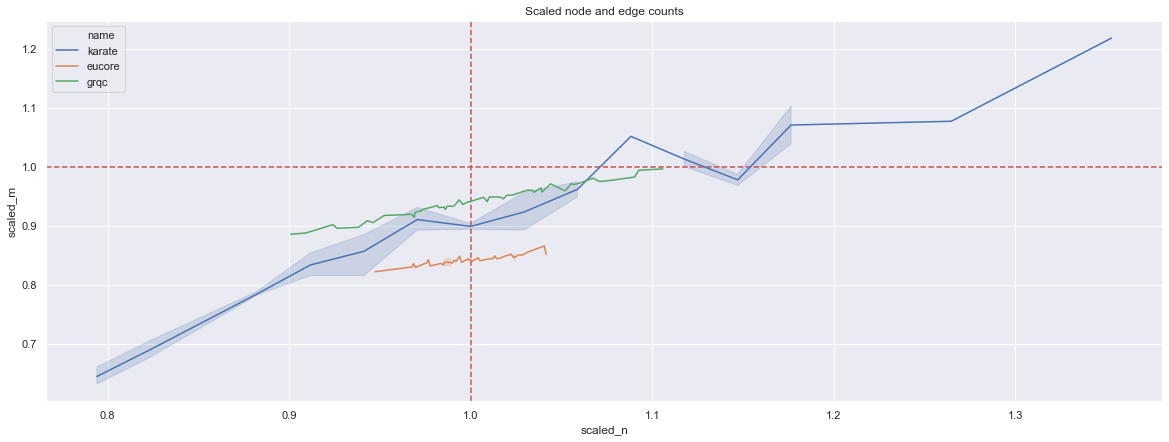

In [98]:
ax = plt.gca()
ax.axvline(x=1, c='r', ls='--')
ax.axhline(y=1, c='r', ls='--')
sns.lineplot(x='scaled_n', y='scaled_m', hue='name', data=df, ci=95);
plt.title('Scaled node and edge counts');

## bar plot number of nodes

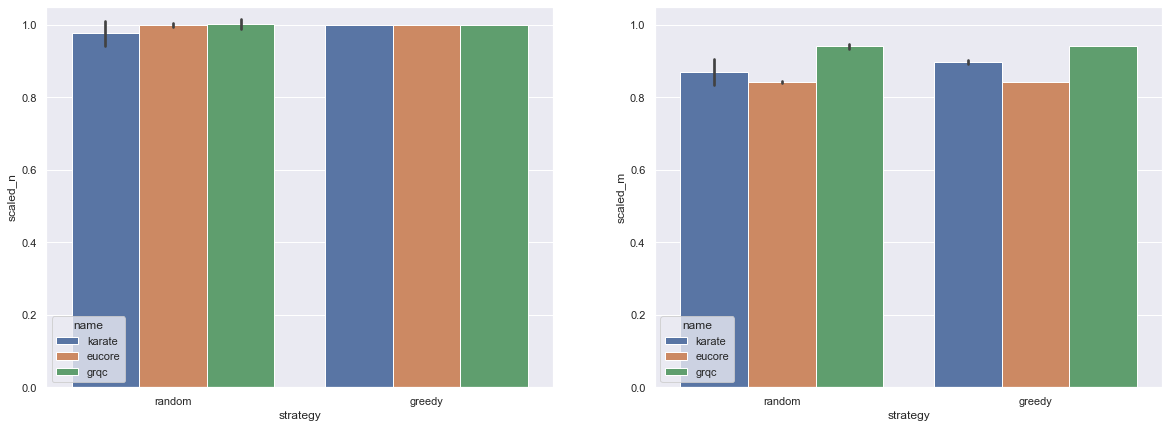

In [99]:
plt.rcParams['figure.figsize'] = [20, 7]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_ylim((0, 1.05))
ax2.set_ylim((0, 1.05))
sns.barplot(x='strategy', y='scaled_n', hue='name', data=df, ax=ax1);
sns.barplot(x='strategy', y='scaled_m', hue='name', data=df, ax=ax2);

# more sophisticated graph measures

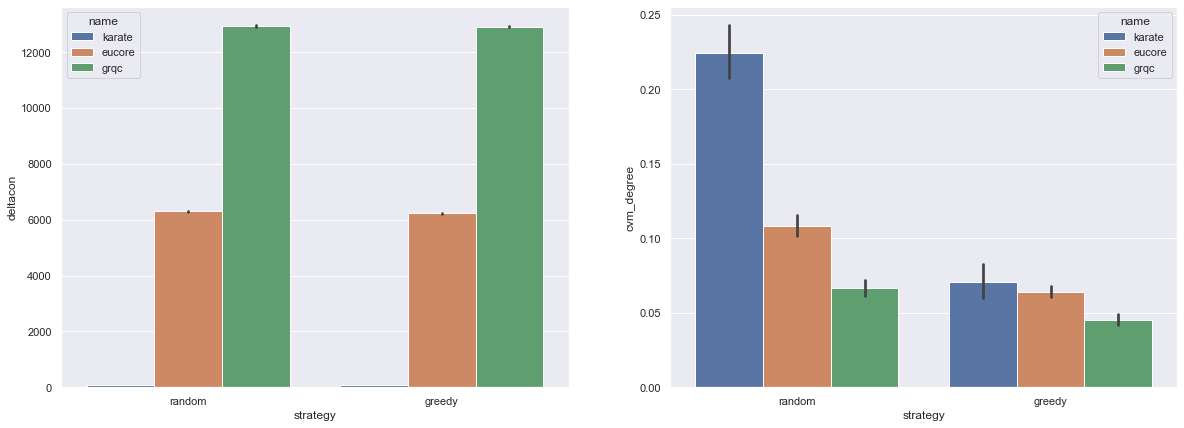

In [131]:
plt.rcParams['figure.figsize'] = [20, 7]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
# ax1.set_ylim((0, 1.05))
# ax2.set_ylim((0, 1.05))
# ax1.set_yscale('log')
sns.barplot(x='strategy', y='deltacon', hue='name', data=df, ax=ax1);
sns.barplot(x='strategy', y='cvm_degree', hue='name', data=df, ax=ax2);

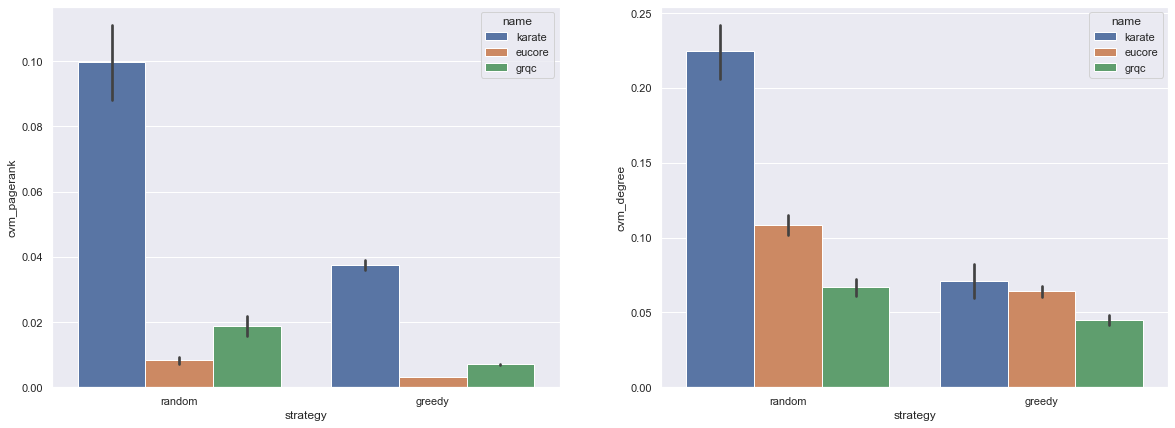

In [132]:
plt.rcParams['figure.figsize'] = [20, 7]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
# ax1.set_ylim((0, 1.05))
# ax2.set_ylim((0, 1.05))
# ax1.set_yscale('log')
sns.barplot(x='strategy', y='cvm_pagerank', hue='name', data=df, ax=ax1);
sns.barplot(x='strategy', y='cvm_degree', hue='name', data=df, ax=ax2);

In [ ]:
plt.rcParams['figure.figsize'] = [20, 7]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
# ax1.set_ylim((0, 1.05))
# ax2.set_ylim((0, 1.05))
# ax1.set_yscale('log')
sns.barplot(x='strategy', y='deltacon', hue='name', data=df, ax=ax1);
sns.barplot(x='strategy', y='cvm_degree', hue='name', data=df, ax=ax2);

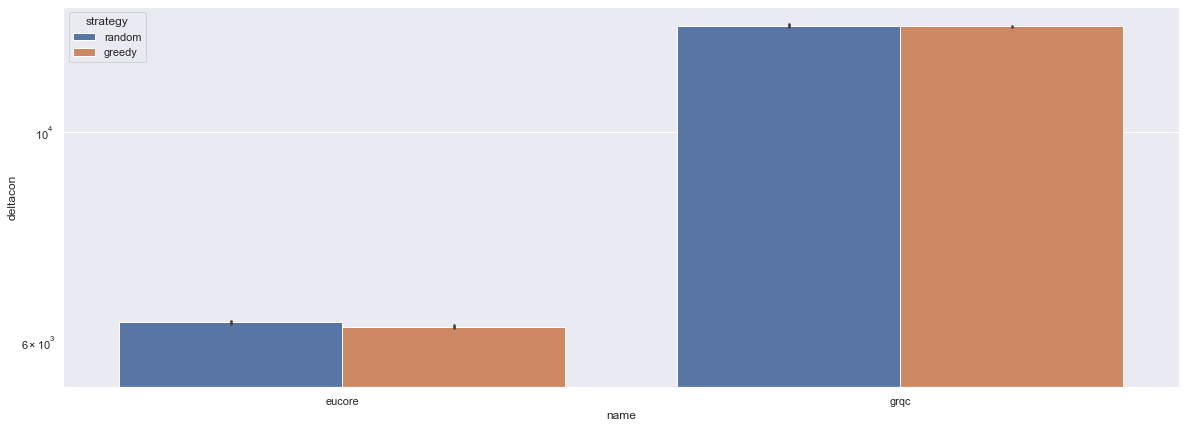

In [151]:
ax = plt.gca()
ax.set_yscale('log')
sns.barplot(x='name', y='deltacon', hue='strategy', data=df[df.name!='karate'], ax=ax);